In [1]:
from pylab import *

In [2]:
def RK_4(edo,x_ini,t, *args):
    sol = zeros( (len(t) , len(x_ini)) )
    sol[0,:] = x_ini
    delta = t[1]-t[0]
    for i in range(0,len(t)-1):
        k1 = edo(sol[i,:],t[i], *args)
        k2 = edo(sol[i,:] + 0.5*delta*k1 , t[i] + 0.5*delta,*args )
        k3 = edo(sol[i,:] + 0.5*delta*k2 , t[i] + 0.5*delta, *args)
        k4 = edo(sol[i,:] + delta*k2 , t[i] + delta, *args)
        sol[i+1,:] = sol[i,:] + (delta/6.0)*(k1 + 2.0*k2 + 2.0*k3 + k4)
    return sol

Si queremos atrapar partículas, la fuerza debe ser de tipo resorte, es decir 

$$
F_x = QE_x  = -\nabla\phi = -kx
$$
Lo mismo debe ocurrir para la coordenada $y$ y la $z$, luego el potencial debe tener la forma:
$$
\phi = \frac{\phi_0}{2r_0^2}(ax^2 + by^2 + cz^2 )
$$
Al imponer la ecuación de Laplace, debe ocurrir que:
$$
\frac{\phi_0}{r_0^2}(a + b + c ) = 0
$$


luego

$$
a + b + c = 0
$$

Nos interesa el caso 2D, entonces elegimos $c = 0$ y $a = -b = 1$

El potencial para el caso bidimensional es:
$$
\phi(x,y,t) = \frac{\phi_0}{2r_0^2}(x^2-y^2)
$$

El teorema de Earnshaw nos impide usar un campo electrostático, luego $\phi_0 = \phi_0(t)$, más concretamente:

$$ \phi_0 =  U - V\cos(\omega t) $$ 
(un voltaje CD más un voltaje AC de amplitud V y frecuencia $\omega$), los electrodos están a un potencial de $\frac{\phi_0}{2}$ (cuando $x^2-y^2 = r_0^2$, es decir una hipérbola)

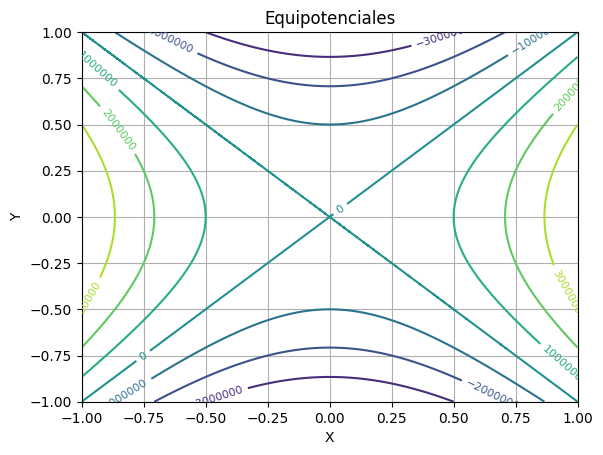

In [99]:
#Elegimos r_0 = 2.5 cm = 0.025 m#
#aquí hacemos un dibujo de los electrodos
r_0 = 0.025
x = linspace(-1, 1,1000)
y = linspace(-1, 1,1000)
X, Y = meshgrid(x, y)
V = 5000 #En este punto podemos ponerle un valor arbitrario a V porque solo vamos a dibujar las equipotenciales 
potencial = (V/(2*r_0**2))*(X**2 - Y**2)
#Usamos countor porque los electrodos de la trampa son equipotenciales, que van a estar a un potencial de V/2 (hipérbola acostada) o -V/2 (hipérbola parada)

curvas = plt.contour(X, Y, potencial) 
clabel(curvas, inline=True, fontsize=8)
title("Equipotenciales")
xlabel("X")
ylabel("Y")
grid()
show()

Entonces las ecuaciones de movimiento son:

$$
\ddot x + \frac{Q}{mr_0^2}(U - V\cos(\omega t))x = 0
$$

$$
\ddot y + \frac{Q}{mr_0^2}(U - V\cos(\omega t))y = 0
$$

Adimensionalisadas, con $2\tau = \omega t$ :

$$
\frac{d^2x}{d\tau^2} + (a - 2q\cos(2\tau))x = 0
$$

$$
\frac{d^2y}{d\tau^2} + (a - 2q\cos(2\tau))y = 0
$$

Con $ a = \frac{4QU}{mr_0^2\omega^2} $ y $ q  = \frac{2QV}{mr_0^2\omega^2} $

Que son las ecuaciones de Mathieu, que admiten soluciones estables e inestables dependiendo de los parámetros $a$ y $q$.
Generalmente las trampas operan con $a = 0$ (sin voltaje de corriente directa), luego la estabilidad depende de $q$, que es inversamente proporcional a la masa de los iones para valores fijos de $e, V, r_0$ y $\omega$.

Con esto podemos empezar a diseñar la trampa. Digamos que queremos que entre cada par de electrodos alineados queremos que haya $5cm$, es decir $r_0 = 2.5 cm = 0.025 m$

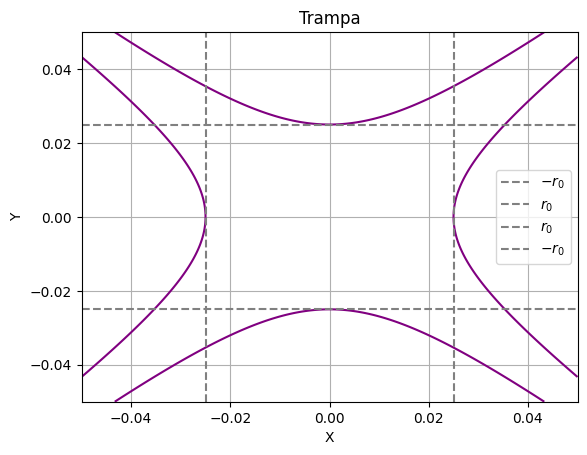

In [62]:
#Elegimos r_0 = 2.5 cm = 0.025 m#
#aquí hacemos un dibujo de los electrodos
r_0 = 0.025
x = linspace(-0.05, 0.05,1000)
y = linspace(-0.05, 0.05,1000)
X, Y = meshgrid(x, y)
V = 5000 #En este punto podemos ponerle un valor arbitrario a V porque solo vamos a dibujar la forma que tiene los electrodos (y todas las equipotenciales)
niveles = [-V/2, V/2]

potencial = (V/(2*r_0**2))*(X**2 - Y**2)
#Usamos countor porque los electrodos de la trampa son equipotenciales, que van a estar a un potencial de V/2 (hipérbola acostada) o -V/2 (hipérbola parada)

curvas = plt.contour(X, Y, potencial, levels = niveles, colors = "Purple", linestyles='solid') 
axhline(-r_0, color='gray', linestyle='--', label  = "$-r_0$")
axvline(r_0, color='gray', linestyle='--', label  = "$r_0$")
axhline(r_0, color='gray', linestyle='--', label  = "$r_0$")
axvline(-r_0, color='gray', linestyle='--', label  = "$-r_0$")
title("Trampa")
xlabel("X")
ylabel("Y")
grid()
legend()
show()

In [4]:
#definimos el sistema de ecuaciones con tiempo adimensional:
def sist_ec(vec, tau, q, a = 0):
     #vec = [x, y, v_x, v_y]
    dx = vec[2]
    dy = vec[3]
    dv_x = (2*q*cos(2*tau)- a)*vec[0]
    dv_y = (2*q*cos(2*tau)- a)*vec[1]
    return array([dx, dy, dv_x, dv_y])

Fijémonos brevemente en la estabilidad de las soluciones, ya fijamos $a = 0$ por lo que dicha estabilidad va a depender de q

In [63]:
#Elejimos ciertas condiciones iniciales
ci = [-0.0001, 0.001, 0.0002, -0.001]
 
tau_0 = arange(0, 100, 0.01) #Un tiempo de prueba porque todavía no fijamos V u \omega

#Proponemos una lista de valores de q:
ques = arange(0,1.3, 0.1)
#Soluciones de prueba:
Pruebas=zeros((len(ques), len(tau_0), 4))
for i in range(len(ques)):
    Pruebas[i] = RK_4(sist_ec, ci ,tau_0, ques[i])


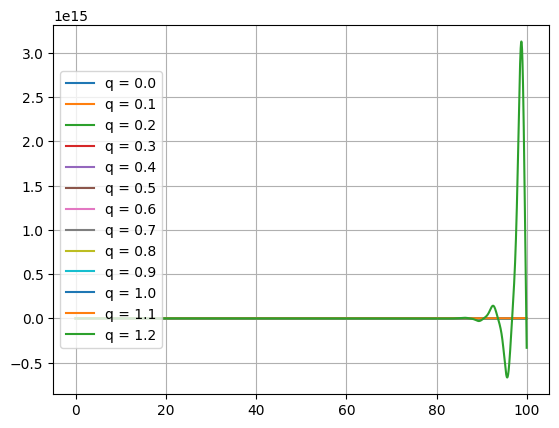

In [64]:
#Graficamos nuestras soluciones prueba
for i in range(len(ques)):
    plot(tau_0, Pruebas[i][:,0], label = f"q = {ques[i]:.1f}")
legend(loc = "center left")
grid()
show()

Vemos que las soluciones comienzan a ser inestables (crecen mucho, o sea que nuestra partícula no se quedaría en la trampa), a partir de ciertos valores de $q$, si hacemos zoom a la gráfica podemos determinar más o menos qué rango de valores de q es aceptable para tener soluciones estables. 

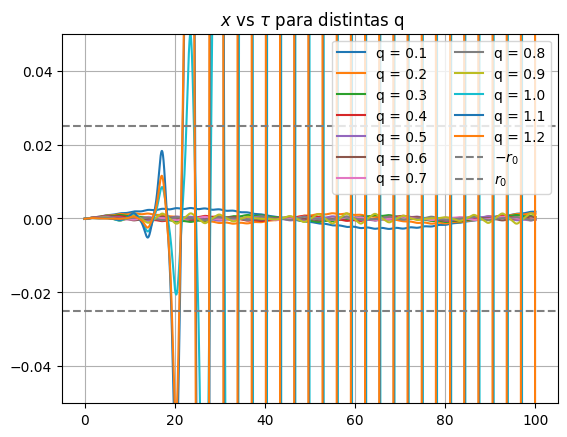

In [71]:
for i in range(1, len(ques)):
    plot(tau_0, Pruebas[i][:,0], label = f"q = {ques[i]:.1f}")
#Para tener una referencia, queremos que |x| siempre sea menor que r_0 para que la partícula se quede dentro de la trampa y no choque con los eletrodos
title(" $x$ vs $\\tau$ para distintas q")
ylim(-0.05, 0.05)
axhline(-0.025, color='gray', linestyle='--', label  = "$-r_0$")
axhline(0.025, color='gray', linestyle='--', label  = "$r_0$")
legend(ncol = 2, loc = "upper right")
grid()
show()

Parece ser que para valores de q menores que 0.9 las soluciones todavía son estables.

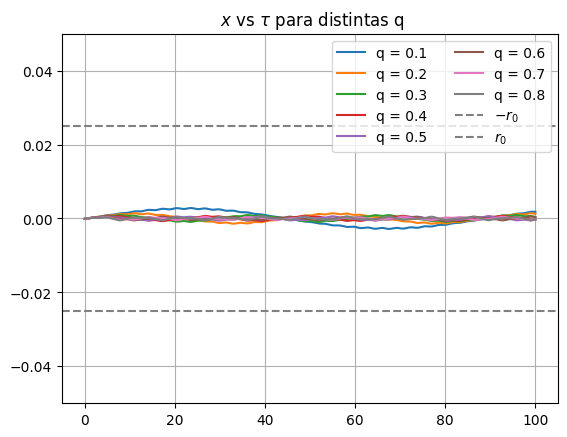

In [72]:
#Ploteamos las q tales que q < 0.9
for i in range(1, len(ques)-4):
    plot(tau_0, Pruebas[i][:,0], label = f"q = {ques[i]:.1f}")
title(" $x$ vs $\\tau$ para distintas q")
ylim(-0.05, 0.05)
axhline(-0.025, color='gray', linestyle='--', label  = "$-r_0$")   
axhline(0.025, color='gray', linestyle='--', label  = "$r_0$")
legend(ncol = 2, loc = "upper right")
grid()
show()

Ahora verificamos que la posición en $y$ también cumpla que $|y| < r_0$

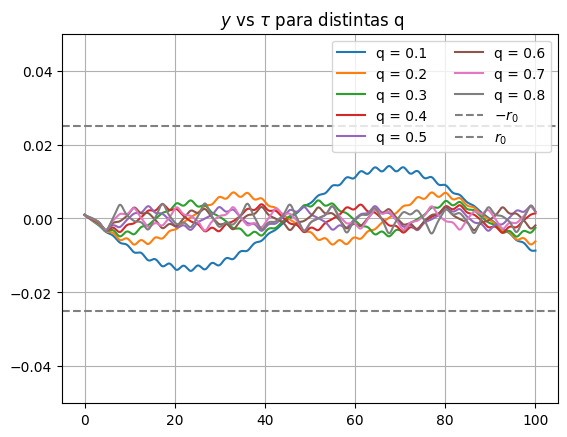

In [73]:
for i in range(1, len(ques)-4):
    plot(tau_0, Pruebas[i][:,1], label = f"q = {ques[i]:.1f}")
title(" $y$ vs $\\tau$ para distintas q")
ylim(-0.05, 0.05)
axhline(-0.025, color='gray', linestyle='--', label  = "$-r_0$")   
axhline(0.025, color='gray', linestyle='--', label  = "$r_0$")
legend(ncol = 2, loc = "upper right")
grid()
show()

Tiene mayor amplitud, pero sigue dentro de la trampa. Con esto ya podemos continuar con la simulación de la trampa, sabiendo que 
$$

q  = \frac{2QV}{mr_0^2\omega^2} < 0.9

$$
Supongamos que queremos confinar núcleos de Helio - 4, eso ya nos da un valor de $\frac{Q}{m}$, que para este caso es de alrededor de  

$$
\frac{Q}{m} = 48214762.71 c/kg
$$

Luego solo restan $V$ y $\omega$ como parámetros libres, la relación que cumplen estos con $q$, nos dice que debemos elegirlos tal que:

$$
\frac{V}{\omega^2} < q\frac{r_0^2}{2}(\frac{m}{Q})
$$

Tenía porblemas porque la omega era muy grande pero yo seguía queriendo integrar en tiempos relativamente largos. El cómo definí las ecuaciones, con el tiempo adimencional $\tau  =\omega t/2$ hace que aunque yo defina un tiempo de 1 segundo, si $\omega = 10MHZ$ entonces estariamos integrando sobre 5 millones de "segundos adimencionales", entonces hay que elegir tiempos más cortitos, en la celda de abajo "$\omega = 20 MHz$" entonces elegí un tiempo de 0.00001 s, de este modo $\tau = \omega t/2 = 100 $

In [74]:
#Parámetros que ya elegimos

r_0 = 0.025         #la trampa tiene un tamaño de unos 2.5 cm
em = 48214762.71    #Relación carga/masa de un núcleo de Helio 4

#Parámetros que nos faltan, pero los elegimos de tal forma que se cumpla la desigualdad de arriba
V = 2300    
omega = 20000000 

#Calculamos la q
q = 2*em*V/((r_0**2)*(omega**2))

#condiciones iniciales
ci = [-0.0001, 0.001, 0.0002, -0.001]
#Simulamos 0.00001 segundos 
t = arange(0, 0.00001, 0.00000001)
tau = omega*t/2
#Encontramos las soluciones
Soluciones = RK_4(sist_ec, ci, tau, q)
#El potencial en función del tiempo y la posición
phi = V*cos(2*tau)/(2*r_0**2)*(Soluciones[:,0]**2 - Soluciones[:,1]**2)

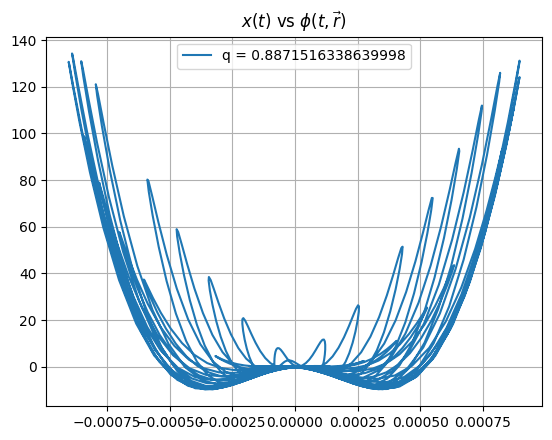

In [78]:
#Una gráfica de x vs phi
title("$x(t)$ vs $\\phi(t, \\vec{r})$")
plot(Soluciones[:,0], phi, label = f"q = {q}") #Pedimos que nos muestre la q para saber que seguimos en el rango estable
legend()
grid()


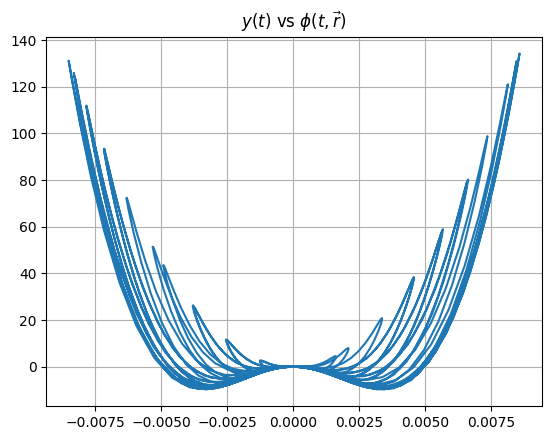

In [79]:
#Una gráfica de y} vs phi
title("$y(t)$ vs $\\phi(t, \\vec{r})$")
plot(Soluciones[:,1], phi)
grid()

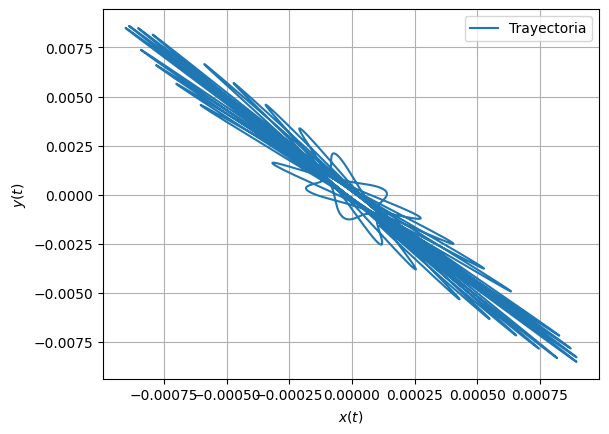

In [82]:
#Ploteamos la trayectoria
plot(Soluciones[:,0], Soluciones[:,1], label = "Trayectoria") #Y la trayectoria
xlabel("$x(t)$")
ylabel("$y(t)$")
legend()
grid()
show()

Ahora dibujamos la trayectoria junto con la trampa

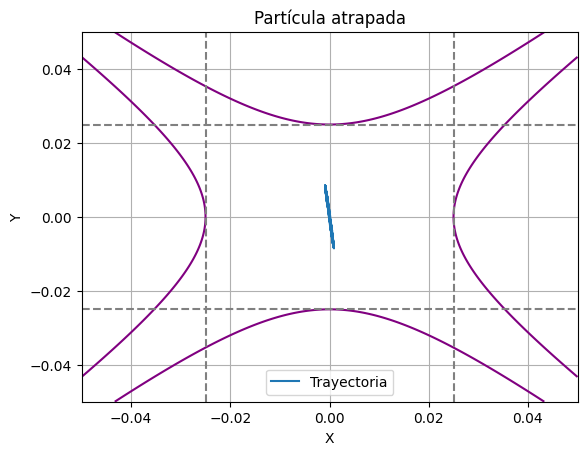

In [86]:
curvas = plt.contour(X, Y, potencial, levels = niveles, colors = "Purple", linestyles='solid') #Ploteamos la trampa otra vez
plot(Soluciones[:,0], Soluciones[:,1], label = "Trayectoria") #Y la trayectoria
axhline(-r_0, color='gray', linestyle='--')
axvline(r_0, color='gray', linestyle='--' )
axhline(r_0, color='gray', linestyle='--')
axvline(-r_0, color='gray', linestyle='--')
title("Partícula atrapada")
xlabel("X")
ylabel("Y")
grid()
legend()
show()

#trayectoria



In [134]:
#Parámetros que ya elegimos

r_0 = 0.025         #la trampa tiene un tamaño de unos 2.5 cm
em = 48214762.71    #Relación carga/masa de un núcleo de Helio 4

#Parámetros que nos faltan, pero los elegimos de tal forma que se cumpla la desigualdad de arriba
V = 2300    
omega = 20000000 

#Calculamos la q
q = 2*em*V/((r_0**2)*(omega**2))

#condiciones iniciales
ci = [-0.0001, 0.001, 0.0002, -0.001]
#Simulamos 0.00001 segundos 
t = arange(0, 0.00001, 0.00000001)
tau = omega*t/2


condiciones = [ [-0.0001, 0.001, 0.0002, -0.001], [0.001, 0.001, 0.0004, -0.0001], [0.003, 0.001, -0.0002, 0.0001], [0.0023, 0.001, -0.0001, -0.0001], [0.0003, -0.0004, -0.0002, -0.0002], [0.003, 0.001, -0.0002, 0.0001], [-0.001, 0.0023, -0.0001, -0.0001]]
trayectorias = zeros((len(condiciones), len(t), 4))
for i in range(len(condiciones)):
    trayectorias[i] = RK_4(sist_ec, condiciones[i], tau, q)

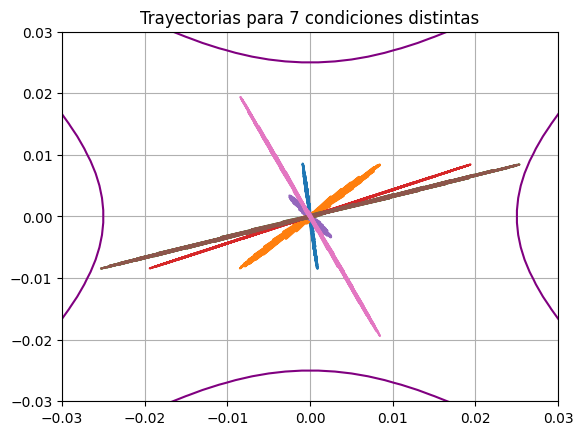

In [136]:
for i in range(len(condiciones)):
    plot(trayectorias[i][:,0], trayectorias[i][:,1])
curvas = plt.contour(X, Y, potencial, levels = niveles, colors = "Purple", linestyles='solid')
ylim(-1.2*r_0, 1.2*r_0)
xlim(-1.2*r_0, 1.2*r_0)
title(f"Trayectorias para {len(condiciones)} condiciones distintas")
grid()
show()